In [1]:
'''
此次作业采用红酒数据，缺省值的处理方法为直接舍去
'''

'\n此次作业采用红酒数据，缺省值的处理方法为直接舍去\n'

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
wine_data = pd.read_csv('data\\wine.csv')

In [4]:
'''
进行关联挖掘的属性列表
由于'description'对于每一项记录均不同，因此此处舍去
'''
attr_list = ['country', 'designation', 'points', 'price','province', 'region_1', 'region_2', 'variety', 'winery']

In [5]:
'''
'points', 'price'为数值属性，做离散化处理。
认为大于均值的为1， 小于等于均值的为0
'''
data = wine_data.dropna()

mean_points, mean_price = data['points'].mean(), data['price'].mean()
points_index_1, points_index_0 = data['points'] > mean_points, data['points'] <= mean_points
price_index_1, price_index_0 = data['price'] > mean_price, data['price'] <= mean_price

data.loc[points_index_1, 'points'], data.loc[points_index_0, 'points']= 1, 0
data.loc[price_index_1, 'price'], data.loc[price_index_0, 'price']= 1, 0

data['points'] = data['points'].astype(str)
data['price'] = data['price'].astype(str)
data = data[attr_list]
print(data)

       country                    designation points price    province  \
0           US              Martha's Vineyard      1   1.0  California   
2           US  Special Selected Late Harvest      1   1.0  California   
3           US                        Reserve      1   1.0      Oregon   
8           US                         Silice      1   1.0      Oregon   
9           US           Gap's Crown Vineyard      1   1.0  California   
...        ...                            ...    ...   ...         ...   
150889      US                Lafond Vineyard      0   0.0  California   
150892      US                        Coastal      0   0.0  California   
150914      US    Late Harvest Cluster Select      1   0.0  California   
150915      US                    Nightingale      1   0.0  California   
150916      US                      J. Schram      1   1.0  California   

                  region_1                 region_2             variety  \
0              Napa Valley          

D:\tool\anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\tool\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\tool\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [6]:
'''
构建记录
'''
transactions = [ tuple(x) for x in data.values.tolist()]


In [7]:
from efficient_apriori import apriori

In [8]:
'''
对数据进行关联规则挖掘.
这里设定最小支持度为0.2，最小置信度为0.6
'''
min_support = 0.2
min_confidence = 0.6
itemsets, rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

In [9]:
'''
频繁项集
'''
print(itemsets)

{1: {('California',): 28557, ('US',): 39241, ('1.0',): 15767, ('1',): 18434, ('0.0',): 23474, ('Central Coast',): 9150, ('0',): 20807}, 2: {('1', '1.0'): 11003, ('1', 'California'): 12955, ('1', 'US'): 18434, ('1.0', 'California'): 12449, ('1.0', 'US'): 15767, ('California', 'US'): 28557, ('0.0', 'California'): 16108, ('0.0', 'US'): 23474, ('California', 'Central Coast'): 9150, ('Central Coast', 'US'): 9150, ('0', '0.0'): 16043, ('0', 'California'): 15602, ('0', 'US'): 20807}, 3: {('1', '1.0', 'California'): 8367, ('1', '1.0', 'US'): 11003, ('1', 'California', 'US'): 12955, ('1.0', 'California', 'US'): 12449, ('0.0', 'California', 'US'): 16108, ('California', 'Central Coast', 'US'): 9150, ('0', '0.0', 'California'): 11520, ('0', '0.0', 'US'): 16043, ('0', 'California', 'US'): 15602}, 4: {('1', '1.0', 'California', 'US'): 8367, ('0', '0.0', 'California', 'US'): 11520}}


In [10]:
'''
关联规则
'''
for rule in sorted(rules, key = lambda rule: rule.lift):
    print(rule)

'''
根据lift与conviction指标,可以有一下几个结论:
1.来自California的红酒评价越高，价格也越贵
2.美国产出的红酒大部分来自于California
'''

{0.0} -> {California} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{0.0, US} -> {California} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{0.0} -> {California, US} (conf: 0.686, supp: 0.410, lift: 0.943, conv: 0.868)
{1} -> {California} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{1, US} -> {California} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{1} -> {California, US} (conf: 0.703, supp: 0.330, lift: 0.966, conv: 0.916)
{0, 0.0} -> {California} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{0, 0.0, US} -> {California} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{0, 0.0} -> {California, US} (conf: 0.718, supp: 0.294, lift: 0.987, conv: 0.966)
{1} -> {US} (conf: 1.000, supp: 0.470, lift: 1.000, conv: 0.000)
{1.0} -> {US} (conf: 1.000, supp: 0.402, lift: 1.000, conv: 0.000)
{US} -> {California} (conf: 0.728, supp: 0.728, lift: 1.000, conv: 1.000)
{California} -> {US} (conf: 1.000, supp: 0.728, lift: 1.000, conv: 0.000)
{0.0} -> {US} (con

'\n根据lift与conviction指标,可以有一下几个结论:\n1.来自California的红酒评价越高，价格也越贵\n2.美国产出的红酒大部分来自于California\n'

In [16]:
'''
可视化
绘制 置信度~支持度关于提升度的散点图
可以看出规则的提升图与置信度一般都很高
'''

'\n可视化\n绘制 置信度~支持度关于提升度的散点图\n可以看出规则的提升图与置信度一般都很高\n'

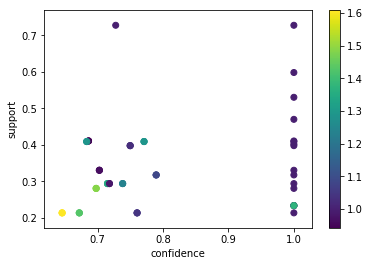

In [17]:
x = [rule.confidence for rule in rules]
y = [rule.support for rule in rules]
z = [rule.lift for rule in rules]
plt.scatter(x, y, c=z, cmap='viridis')
plt.xlabel('confidence')
plt.ylabel('support')
plt.colorbar()
plt.show()


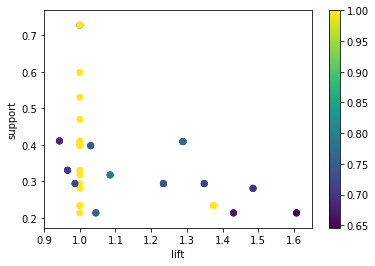

In [18]:
x = [rule.lift for rule in rules]  
y = [rule.support for rule in rules]
z = [rule.confidence for rule in rules]
plt.scatter(x, y, c=z, cmap='viridis')
plt.xlabel('lift')
plt.ylabel('support')
plt.colorbar()
plt.show()